### Codes for averaging measured traces of Rabi measurements

Note that there is a 'INDEX.CSV' file in each folder of saved traces, so please change the format of this file to 'INDEX.txt' before running this code

In [55]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt

In [56]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Infrared\\0_1%_Rabi'
folder = '20221128'
sub_folders = ['RAB11281','RAB11282','RAB11283','RAB11284']
Input_power=np.array([5.16,4.95,4.24,2.51])

num_of_subfolders=np.size(sub_folders)

out_data=[]
out_data=pd.DataFrame(out_data)

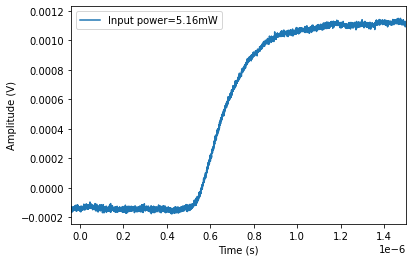

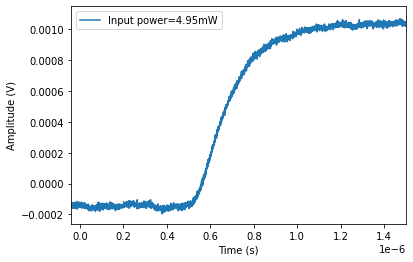

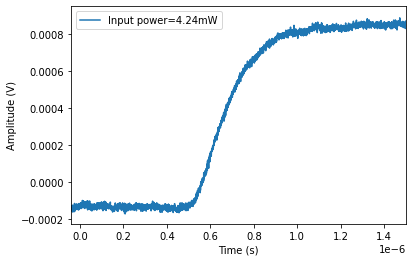

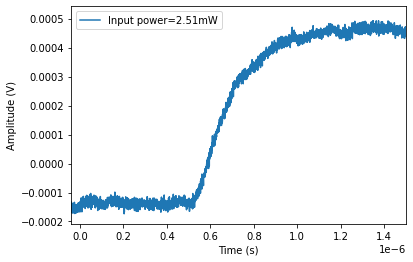

In [57]:
for index_0, file_0 in enumerate(sub_folders):
    path=dir + '\\' + folder + '\\' + sub_folders[index_0] + '\\'
    file_list = os.listdir(path)
    list_csv=natsorted([i for i in file_list if i.endswith('.CSV')])
    file_size=np.shape(list_csv)
    data_0=pd.read_csv(os.path.join(path,list_csv[0]))
    data_0=data_0.to_numpy()

    sum_rabi=data_0[:,2]
    time=data_0[:,0]

    for index_1 in range(1,int(file_size[0])-1):
        data=pd.read_csv(os.path.join(path,list_csv[index_1]))
        data=data.to_numpy()
        sum_rabi=sum_rabi+data[:,2]
        average_rabi=sum_rabi/file_size
    
    time_dataframe=pd.DataFrame(time)
    ave_rabi_dataframe=pd.DataFrame(average_rabi)
    out_data[index_0*2]=time_dataframe[0]
    out_data[index_0*2+1]=ave_rabi_dataframe[0]

    fig, ax =plt.subplots()
    ax.plot(time,average_rabi,label='Input power='+"{}".format(Input_power[index_0]) + 'mW') 
    ax.legend()   
    ax.set_xlim(-0.4e-7,1.5e-6)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (V)')

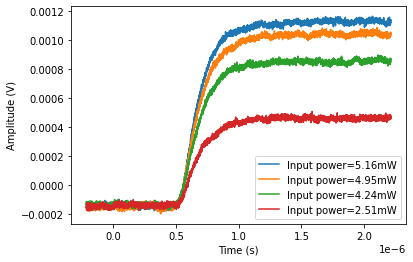

In [58]:
out_data_np=out_data.to_numpy()
fig,ax=plt.subplots()
for index in range(num_of_subfolders):
    ax.plot(out_data_np[:,index*2],out_data_np[:,index*2+1],label='Input power='+"{}".format(Input_power[index]) + 'mW')
    ax.legend() 
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (V)')